<a href="https://colab.research.google.com/github/vitor-edu/Programa-de-Formacao-Big-Data-BRQ/blob/main/Aula06_05_05_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão** **Linear**

Utilização de regressão linear para prever o valor de um imóvel com base no valor de imóveis semelhantes na mesma região.

In [ ]:
# Importação das bibliotecas

import pandas as pd # Manipulação de dados
import numpy as np # Operação de matrizes
import matplotlib.pyplot as plt # Plots graficos
import seaborn as sns # Biblioteca para visualização de dados
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing (3).csv


In [ ]:
# Leitura do arquivo csv
df = pd.read_csv('USA_Housing.csv')

In [ ]:
# Exibição das colunas
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
'''
O dataframe contêm as seguintes colunas:
• 'Avg. Area Income': A renda média dos residentes da cidade onde a casa está
localizada.
• 'Avg. Area House Age': Idade média das casas na mesma cidade.
• 'Avg. Area Number of Rooms': Número Médio de Cômodos para Casas na mesma
cidade.
• 'Avg. Area Number of Bedrooms': Número Médio de Quartos para Casas na mesma
cidade.
• 'Area Population': a população da cidade onde está localizada as Casas.
• 'Price': preço em que a casa foi vendida.
• 'Address': Endereço da casa.
'''

"\nO dataframe contêm as seguintes colunas:\n• 'Avg. Area Income': A renda média dos residentes da cidade onde a casa está\nlocalizada.\n• 'Avg. Area House Age': Idade média das casas na mesma cidade.\n• 'Avg. Area Number of Rooms': Número Médio de Cômodos para Casas na mesma\ncidade.\n• 'Avg. Area Number of Bedrooms': Número Médio de Quartos para Casas na mesma\ncidade.\n• 'Area Population': a população da cidade onde está localizada as Casas.\n• 'Price': preço em que a casa foi vendida.\n• 'Address': Endereço da casa.\n"

**Análise exploratória dos dados**

In [ ]:
# Verificando as primeiras instâncias
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# identificar o tipo de cada váriavel
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

* Normalizando os dados

In [ ]:
# Excluir a coluna endereço, pois não é util para o modelo preditivo.
df.drop('Address', axis=1, inplace=True)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
# Normalização do dataframe
normalized_df = (df-df.min()) / (df.max()-df.min())

Modelagem

In [ ]:
'''
Variáveis preditoras:
Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Variável de resposta:
Price
'''

'\nVariáveis preditoras:\nAvg. Area Income\nAvg. Area House Age\nAvg. Area Number of Rooms\nAvg. Area Number of Bedrooms\nArea Population\nVariável de resposta:\nPrice\n'

* Aplicando o Modelo de Regressão Linear<br>

Vamos agora começar a treinar o modelo de regressão! Primeiro, precisamos dividir
nossos dados em uma matriz X que contém os recursos para treinamento e uma matriz
y com a variável de destino, neste caso a coluna Preço. Jogaremos fora a coluna
Endereço, pois ela possui apenas informações de texto que o modelo de regressão
linear não pode usar.
Matriz X e y

X - variáveis preditoras <br>
y - variável de resposta

In [ ]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

* Dividindo os dados em Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

* Criando e Treinando o Modelo

In [ ]:
from sklearn.linear_model import LinearRegression

# Criando o modelo preditor
modelopreditor = LinearRegression()

# Aqui ocorre o aprendizado
modelopreditor.fit(x_train, y_train)

# Impressão dos coeficientes com os nomes das colunas
coeff = pd.DataFrame(modelopreditor.coef_, x.columns, columns=['Coeficiente'])

coeff

,Coeficiente
Avg. Area Income,21.525435
Avg. Area House Age,166415.114396
Avg. Area Number of Rooms,119802.717039
Avg. Area Number of Bedrooms,1783.166098
Area Population,15.387540


Interpretando os coeficientes<br>
* O aumento de 1 unidade na Avg. Area Income aumenta o preço em 21,57 USD.
* O aumento de 1 unidade na Avg. Area House Age aumento o preço em 166.552,47 USD.
* O Aumento de 1 unidade na Avg. Area Number Of Rooms aumenta o preço em 119.512,53 USD.
* O aumento de 1 unidade na Avg. Area Number of Bedrooms aumenta o preço em 2.758,95 USD.
* O aumento de 1 unidade na Area Population aumenta o preço em 15,29 USD.

**Avaliação**

In [ ]:
# Fazendo predições com os dados de teste
predictions = modelopreditor.predict(x_test)

In [ ]:
# Imprimindo as primeiras variáveis preditoras
x_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3431,50570.864807,5.828143,4.851423,4.36,40580.092291
2042,65314.720112,6.918945,6.245656,2.42,36565.029831
79,64419.252638,6.954422,8.516160,6.16,39318.170755
4663,60390.502855,5.195406,8.368913,6.27,37921.720586
3640,73068.518101,7.271422,5.685408,3.14,42929.876157


In [ ]:
# Predições realizadas
predictions

array([ 631305.0584258 , 1231990.56161572, 1539664.80551512, ...,
       1251986.62330105, 1036432.95159371, 1553580.80137947])

In [ ]:
# Valores reais para acertar
y_test.head()

3431    6.129387e+05
2042    1.347083e+06
79      1.492011e+06
4663    1.223915e+06
3640    1.368692e+06
Name: Price, dtype: float64

Avaliando nosso modelo:
Aqui estão três métricas de avaliação comuns para problemas de regressão:<br>
* Mean Absolute Error (MAE) é a média do valor absoluto dos erros:
* Mean Squared Error (MSE) é a média dos erros quadráticos:
* Root Mean Squared Error (RMSE) é a raiz quadrada da média dos erros ao
quadrado:
Comparando estas métricas:
* MAE é o mais fácil de entender, porque é o erro médio.
* MSE é mais popular que o MAE, porque o MSE "pune" erros maiores, o que tende a
ser útil no mundo real.
* RMSE é ainda mais popular que o MSE, porque o RMSE é interpretável nas
unidades do eixo "y".<br>
Todas essas são funções de perda, porque queremos minimizá-las.

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print('MSE:', metrics.mean_squared_error(y_test, predictions))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 80728.9338454242
MSE: 10077066685.875519
RMSE: 100384.5938671643


# Regressão Linear - Bike-Sharing

In [ ]:
# Importação das bibliotecas

import pandas as pd # Manipulação de dados
import numpy as np # Operação de matrizes
import matplotlib.pyplot as plt # Plots graficos
import seaborn as sns # Biblioteca para visualização de dados
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (3).csv


In [ ]:
df = pd.read_csv('day.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.drop('instant', axis=1, inplace=True)

In [ ]:
df.drop('dteday', axis=1, inplace=True)

In [ ]:
# df.drop('registered', axis=1, inplace=True)

In [ ]:
print(df)

     season  yr  mnth  holiday  ...       hum  windspeed  casual   cnt
0         1   0     1        0  ...  0.805833   0.160446     331   985
1         1   0     1        0  ...  0.696087   0.248539     131   801
2         1   0     1        0  ...  0.437273   0.248309     120  1349
3         1   0     1        0  ...  0.590435   0.160296     108  1562
4         1   0     1        0  ...  0.436957   0.186900      82  1600
..      ...  ..   ...      ...  ...       ...        ...     ...   ...
726       1   1    12        0  ...  0.652917   0.350133     247  2114
727       1   1    12        0  ...  0.590000   0.155471     644  3095
728       1   1    12        0  ...  0.752917   0.124383     159  1341
729       1   1    12        0  ...  0.483333   0.350754     364  1796
730       1   1    12        0  ...  0.577500   0.154846     439  2729

[731 rows x 13 columns]


In [ ]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.100659


In [ ]:
# Normalização dos dados

normalized_df = (df-df.min()) / (df.max()-df.min())

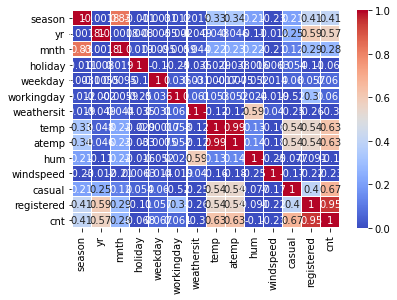

In [ ]:
# heatmap com a coluna registered
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=0.1,vmin=0,vmax=1)

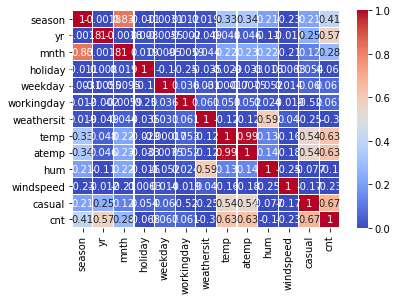

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=0.1,vmin=0,vmax=1)

In [ ]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'cnt'],
      dtype='object')

In [ ]:
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual']]
y = df['cnt']

In [ ]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [ ]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mp = LinearRegression()
mp.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mp.intercept_

349.78114340360753

Calculando os coeficientes

In [ ]:
# test com a coluna "registered"
mp.coef_

array([ 2.55627007e-13, -1.88737914e-13, -5.26158977e-14, -4.67302562e-13,
       -9.24381285e-15,  5.48675941e-13, -4.02658999e-14,  7.82618409e-13,
        1.05984884e-12, -2.74640594e-13,  8.31275173e-13,  1.00000000e+00,
        1.00000000e+00])

In [ ]:
# test 2 sem a coluna "registered"
mp.coef_

array([ 4.27967701e+02,  1.64363456e+03, -1.67299500e+01, -9.44794485e+01,
        1.51278255e+01,  1.34645282e+03, -4.31139078e+02,  5.65989747e+02,
        2.03277456e+03, -4.59402092e+02, -1.13837427e+03,  1.49144255e+00])

In [ ]:
coeff = pd.DataFrame(mp.coef_,X.columns, columns = ['Coeficiente'])
coeff

,Coeficiente
season,2.556270e-13
yr,-1.887379e-13
mnth,-5.261590e-14
holiday,-4.673026e-13
weekday,-9.243813e-15
workingday,5.486759e-13
weathersit,-4.026590e-14
temp,7.826184e-13
atemp,1.059849e-12
hum,-2.746406e-13


In [ ]:
# test 2
coeff = pd.DataFrame(mp.coef_,X.columns, columns = ['Coeficiente'])
coeff

,Coeficiente
season,427.967701
yr,1643.634561
mnth,-16.729950
holiday,-94.479449
weekday,15.127825
workingday,1346.452824
weathersit,-431.139078
temp,565.989747
atemp,2032.774557
hum,-459.402092


Previsões

In [ ]:
predicao = mp.predict(X_test)
X_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
283,4,0,10,0,2,1,2,0.566667,0.546096,0.808750,0.143042,667,3896
453,2,1,3,0,4,1,1,0.494167,0.482304,0.439167,0.319650,834,5299
266,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776,3647
269,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643
120,2,0,5,0,0,0,2,0.451667,0.448204,0.762083,0.106354,1138,2213


In [ ]:
# test 2
predicao = mp.predict(X_test)
X_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
283,4,0,10,0,2,1,2,0.566667,0.546096,0.808750,0.143042,667
453,2,1,3,0,4,1,1,0.494167,0.482304,0.439167,0.319650,834
266,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776
269,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477
120,2,0,5,0,0,0,2,0.451667,0.448204,0.762083,0.106354,1138


In [ ]:
predicao

array([4563., 6133., 5423., 4120., 3351., 4911., 4195., 4378., 5202.,
       5260., 2227., 7375., 1969., 1248., 5463., 5918., 4098., 5169.,
       3376., 2114., 1421., 6392., 6639., 2660., 4996., 2432., 5047.,
       4094., 3820., 4845., 6597., 4835., 1495., 5119., 6786., 7509.,
       5585., 7713., 7870., 4592., 3624., 1650., 3840., 7282., 7605.,
       3272., 6312., 3872., 6852., 3922., 6544., 3510., 3982., 4492.,
       5130., 4758., 1263., 1013., 6370., 3392., 5259., 4338., 1011.,
       7665., 3331., 4205., 2743., 7112., 5010., 5062., 7006., 1623.,
       6234., 4660., 7415., 4717., 4333., 4154.,  959., 3544.,  822.,
       5728., 5805., 2703., 7641., 1917., 4326., 1635., 4459., 4672.,
       2294., 7494., 4151., 1795., 1842., 5501., 4362., 4304., 3750.,
       2402., 5634., 3744., 5298., 1321., 5698., 5102., 4866., 5687.,
       1096., 7466., 3761., 1501., 7582., 6606., 2376., 4708., 6230.,
       3249.,  801., 6891., 4648., 7499., 4509., 7273., 7132., 6241.,
       4075., 5515.,

In [ ]:
# test 2 
predicao

array([4300.0159367 , 5713.3225702 , 4793.59897832, 4123.87235875,
       2652.61365605, 4876.23245589, 4017.30210795, 4366.04053575,
       5091.14178959, 5505.98681287, 2292.70718907, 6986.63967522,
       1310.30545977,  548.07997463, 7062.59548487, 5605.34244177,
       4294.12417508, 6569.69343753, 3582.54881843, 3039.73045745,
       1915.42421108, 5525.62212953, 6925.99712363, 1732.27005546,
       4702.72697164, 3193.21417992, 4759.55393413, 4680.83378089,
       3656.34235475, 5060.71828762, 7225.83274002, 4335.02481794,
       2773.43228363, 5902.49149936, 7116.05463562, 6319.50707747,
       5754.76821517, 7235.16726806, 6736.21425755, 4957.27873139,
       3779.42438814, 1601.00253257, 4729.24012345, 6722.50807485,
       7452.80531784, 3916.91076891, 5894.16419608, 3265.02886548,
       7152.990618  , 3568.74539362, 7290.47666555, 4443.16303032,
       4565.338966  , 3646.27102943, 4973.00517117, 4784.99164508,
       1370.13917808, 2184.17862565, 5102.33138506, 3563.32632

In [ ]:
y_test.head()

283    4563
453    6133
266    5423
269    4120
120    3351
Name: cnt, dtype: int64

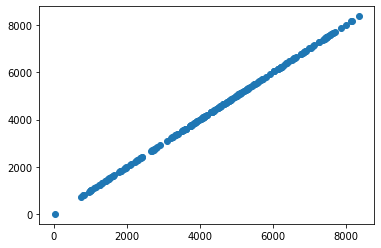

In [ ]:
plt.scatter(y_test, predicao)
plt.show()

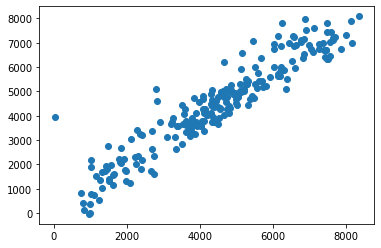

In [ ]:
#test 2
plt.scatter(y_test, predicao)
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))

MAE: 6.924561933952976e-13
MSE: 8.499750782966765e-25
RMSE: 9.219409299389395e-13


In [ ]:
# test 2
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))

MAE: 493.1528746387644
MSE: 430048.15397931717
RMSE: 655.7805684673168


7.656560966629723e-11